## Flow study

In [2]:
import networkx as nx
import numpy as np
import time
# Open adjencency list file and build the undirected graph
f=open("../lightningAdjList.txt", 'rb')
G=nx.read_multiline_adjlist(f, create_using=nx.Graph)
f.close()

print("Number of nodes: " + str(G.number_of_nodes()))
print("Number of edges: " + str(G.number_of_edges()))

# Read alias file and create a pub_key -> alias dic

Number of nodes: 1647
Number of edges: 8508


In [3]:
# Get the shortest path between all nodes
shortest_paths = dict(nx.all_pairs_shortest_path(G))

# The bottleneck of a path
minCap = 10**10

# Capacity of the edge we are iteration in
edgeCap = 0

# Total number of paths
totalPaths = 0
pathsWithCapacity = [0] * 100

# Iterate through all the shortest paths
for source, paths in shortest_paths.items():
    
    # Iterate through all the paths starting from one source
    for target, path in paths.items():
        
        # Reset threshold capacity
        minCap = 10**10
        
        # Iterate through edges of path and get threshold capacity
        for nodeNumber in range(1, len(path) - 1):
            
            edgeCap = (G.get_edge_data(path[nodeNumber], path[nodeNumber + 1]))["capacity"]
            if edgeCap < minCap:
                minCap = edgeCap
    
        # Save threshold against predefined capacities
        for i in range(0,100):
            if 10000*i < minCap:
                pathsWithCapacity[i]+=1

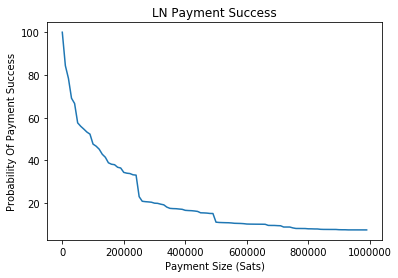

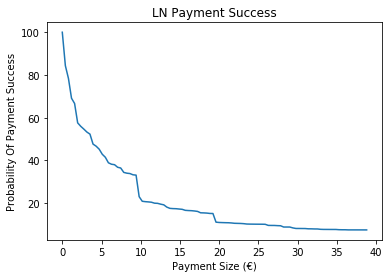

In [5]:
import matplotlib.pyplot as plt

# Graph with Probability of payment success as a function of payments size (satoshis)
totalPaths = pathsWithCapacity[0]
paymentProb = [(i/totalPaths)*100 for i in pathsWithCapacity]
paymentSize = [10000*i for i in range(0,100)]

plt.plot(paymentSize, paymentProb)
plt.title("LN Shortest Path Payment Success")
plt.ylabel("Probability Of Payment Success")
plt.xlabel("Payment Size (Sats)")

plt.show()

# Graph with Probability of payment success as a function of payments size (€)
totalPaths = pathsWithCapacity[0]
paymentProb = [(i/totalPaths)*100 for i in pathsWithCapacity]
paymentSize = [(10000*i)*0.00003920 for i in range(0,100)]

plt.plot(paymentSize, paymentProb)
plt.title("LN Shortest Path Payment Success")
plt.ylabel("Probability Of Payment Success")
plt.xlabel("Payment Size (€)")

plt.show()

In [30]:
import random

# Get the flow value between some random pairs of nodes and store it
nodes =  list(G.nodes())
maxFlows = []
numNodes = len(nodes)
flowsWithCapacity = [0] * 100

for i in range (0, 1000):
    
    #Get a random source and sink
    randomResult = random.sample(range(0, numNodes - 1), 2)
    source = nodes[randomResult[0]]
    sink = nodes[randomResult[1]]
    
    # Make sure they are different
    if(source != sink):
        flow_value = nx.maximum_flow_value(G, source, sink)
        
        # Save threshold against predefined capacities
        for i in range(0,100):
            if 10000*i < flow_value:
                pathsWithCapacity[i]+=1
        
    if i % 100 == 0:
        print(i)

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Graph with Probability of payment success as a function of payments size (satoshis)
totalPaths = flowsWithCapacity[0]
paymentProb = [(i/totalPaths)*100 for i in flowsWithCapacity]
paymentSize = [10000*i for i in range(0,100)]

plt.plot(paymentSize, paymentProb)
plt.title("LN Biggest Flow Payment Success")
plt.ylabel("Probability Of Payment Success")
plt.xlabel("Payment Size (Sats)")

plt.show()